In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint   # 求解微分方程
import matplotlib as mpl    
mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False   #正常显示图像中的负号

In [2]:
# 定义转换函数，将比例转为0-1之间，微分求解会根出现小于0或大于1的情况，但现实是当演化状态达到0或1则停止
def transform(result):
    if result<0:
        result = 0
        return result
    elif result>1:
        result = 1
        return result
    else:
        return result       

#定义关于黑客入侵比例y的复制动态函数
def func_y(y, t):    
    x = list_x[-1]                       # list_x用于维护黑客入侵比例x的记录
    return np.array(y*(1-y) *(x*a*c*L - (x*a*c*L)/(k*z+1)-z))

#定义关于企业进行投资比例x的复制动态函数
def func_x(x, t):
    y = list_y[-2]                      # list_y用于维护企业投资比例y的记录,这里之所以为倒数第2个是遵循黑客先攻击，企业再投资的逻辑
    return np.array(x * (1-x) *((y*a*L*c)/(k*z+1) + (1-y)*a*c*L - C))

## 第一种情形：动态复制方程x和y的临界点在0和1之间

In [3]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = max((k*z+1)/(k*a*c),C/(a*c))            # 企业损失的最小值，保证满足该情形的必要条件
high = (k*z+1)*C/(a*c)                        # 企业损失的最大值，保证满足该情形的必要条件

# 判断上述参数假设是否合理
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


### 第一种子情况：
x和y的初始比例都大于动态复制方程x和y的临界点

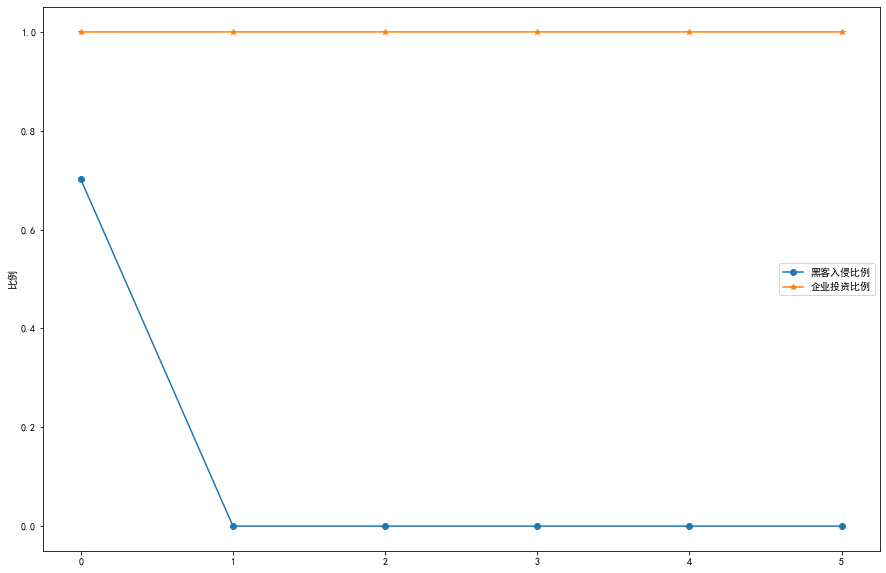

In [4]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform((k*z+1)/(k*a*c*L),1)                   # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform((k*z+1)*(a*c*L-C)/(k*a*c*z*L),1)      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代（模拟了很多次，极少数在5次以内不收敛到指定情况，可以把迭代次数增加）
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

在这种情况下，企业投资比例y的演化稳定状态为1，而黑客入侵比例x的演化稳定状态为0。

### 第二种子情况：
x的初始比例小于动态复制方程x的临界点，y的初始比例大于动态复制方程y的临界点

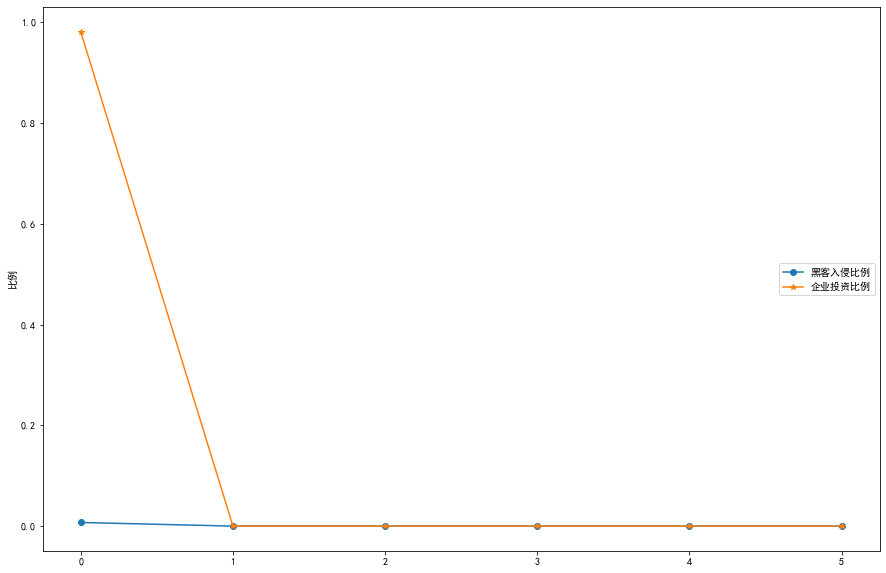

In [5]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,(k*z+1)/(k*a*c*L))                   # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform((k*z+1)*(a*c*L-C)/(k*a*c*z*L),1)      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

在这种情况下，企业投资比例y的演化稳定状态为0，黑客入侵比例x的演化稳定状态为0。

### 第三种子情况：
x的初始比例小于动态复制方程x的临界点，y的初始比例小于动态复制方程y的临界点

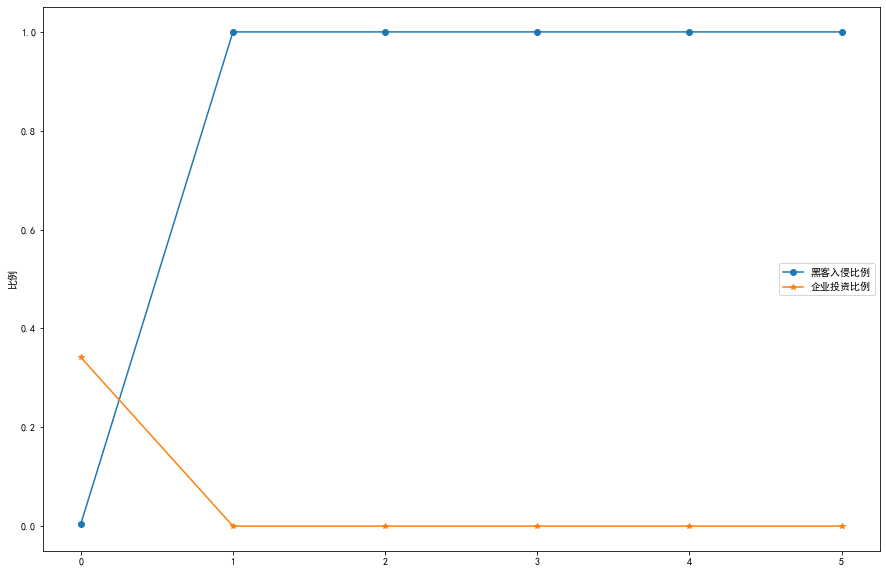

In [6]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,(k*z+1)/(k*a*c*L))                   # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform(0,(k*z+1)*(a*c*L-C)/(k*a*c*z*L))      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

在这种情况下，企业投资比例y的演化稳定状态都为0，黑客入侵比例x的演化稳定状态为1。

### 第四种子情况：
x的初始比例大于动态复制方程x的临界点，y的初始比例小于动态复制方程y的临界点

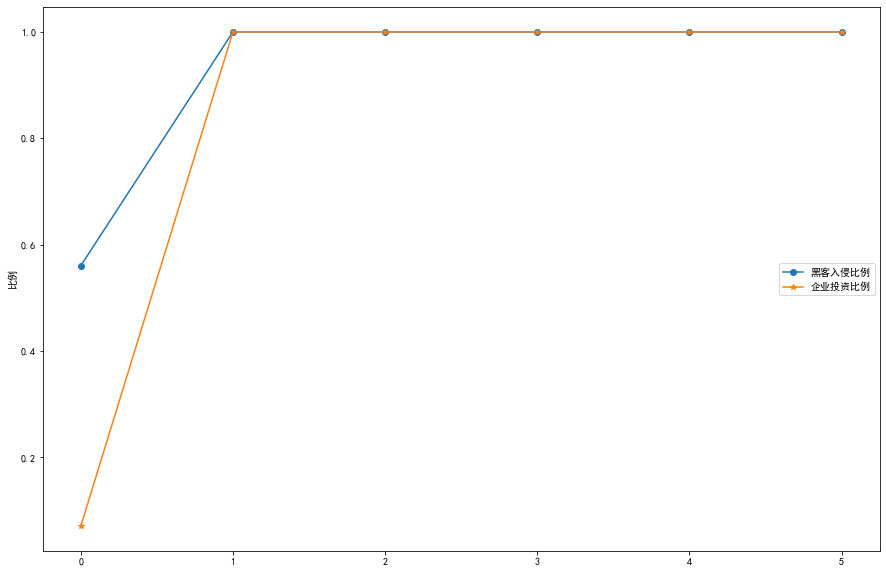

In [7]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform((k*z+1)/(k*a*c*L),1)                   # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform(0,(k*z+1)*(a*c*L-C)/(k*a*c*z*L))      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

在这种情况下，企业投资比例y的演化稳定状态都为1，黑客入侵比例x的演化稳定状态为1。

## 第二种情形：动态复制方程y的临界点在0和1之间，但x的临界点大于等于1

In [8]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = C/(a*c)                                  # 企业损失的最小值，保证满足该情形的必要条件
high = min(C*(k*z+1)/(a*c),(k*z+1)/k*a*c)      # 企业损失的最大值，保证满足该情形的必要条件
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

此时企业损失最小值为： 62499.999999999985
此时企业损失最大值为： 80.10000000000001
参数假设不合理，请重新假设


In [9]:
# 初始化
z = 1000         # 企业投资水平
k = 0.000001          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = C/(a*c)                                  # 企业损失的最小值，保证满足该情形的必要条件
high = min(C*(k*z+1)/(a*c),(k*z+1)/k*a*c)      # 企业损失的最大值，保证满足该情形的必要条件
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


上述可通过降低投资效率k参数或降低黑客入侵成本C使得满足该情形条件，说明现实条件中可以通过提高投资效率提高黑客入侵成本从而避免该情况的发生

### 第一种子情况（改变k）：
y的初始比例大于动态复制方程y的临界点

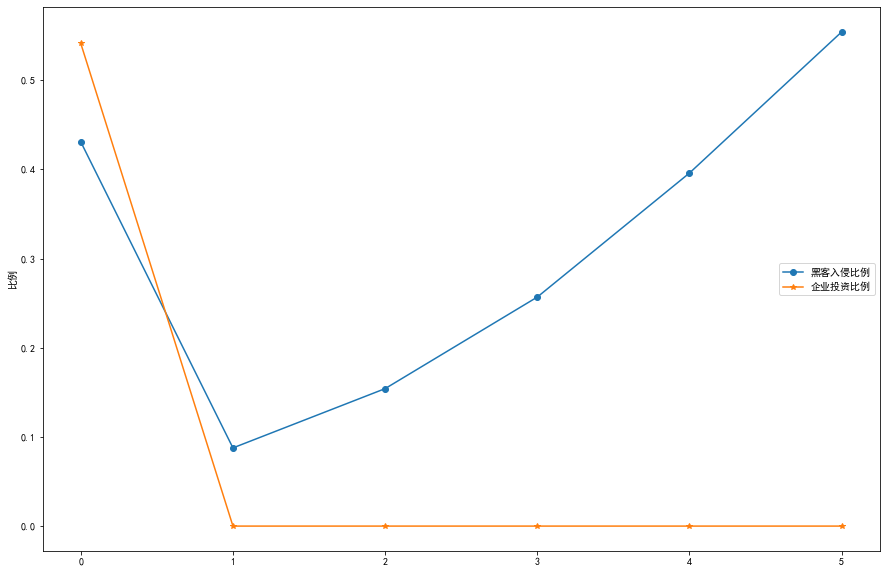

In [10]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,1)                                    # 黑客入侵的初始比例，保证满足x的取值范围，此处对x不要求，取0-1区间
init_y = random.uniform((k*z+1)*(a*c*L-C)/(k*a*c*z*L),1)      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

### 第二种子情况：
y的初始比例小于动态复制方程y的临界点

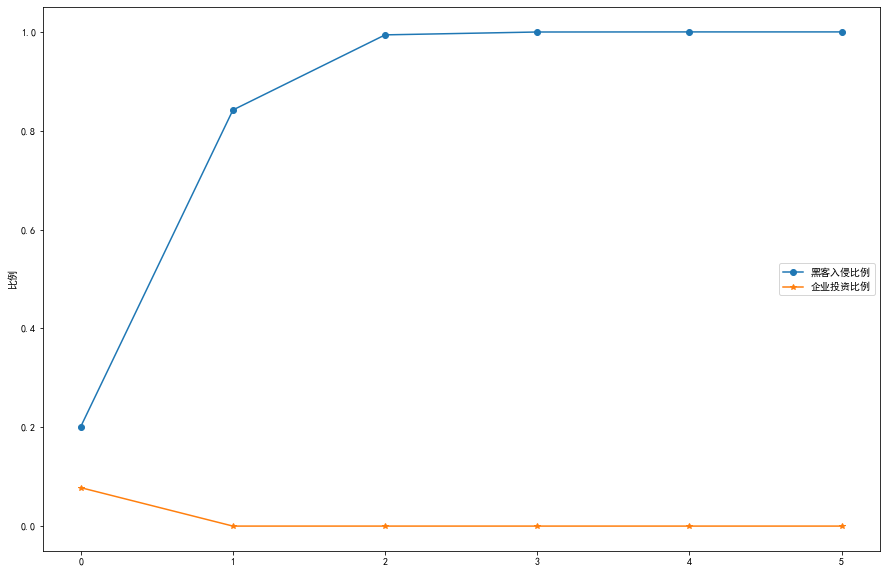

In [11]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,1)                                    # 黑客入侵的初始比例，保证满足x的取值范围，此处对x不要求，取0-1区间
init_y = random.uniform(0,(k*z+1)*(a*c*L-C)/(k*a*c*z*L))      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

In [12]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 1         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = C/(a*c)                                  # 企业损失的最小值，保证满足该情形的必要条件
high = min(C*(k*z+1)/(a*c),(k*z+1)/k*a*c)      # 企业损失的最大值，保证满足该情形的必要条件
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


### 第一种子情况（改变C）：
y的初始比例大于动态复制方程y的临界点

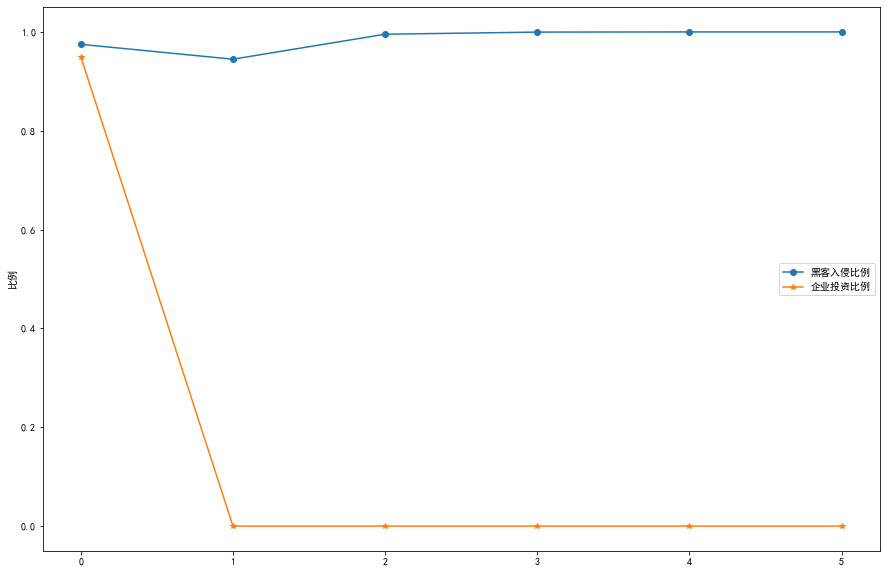

In [13]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,1)                                    # 黑客入侵的初始比例，保证满足x的取值范围，此处对x不要求，取0-1区间
init_y = random.uniform((k*z+1)*(a*c*L-C)/(k*a*c*z*L),1)      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

### 第二种子情况：
y的初始比例小于动态复制方程y的临界点

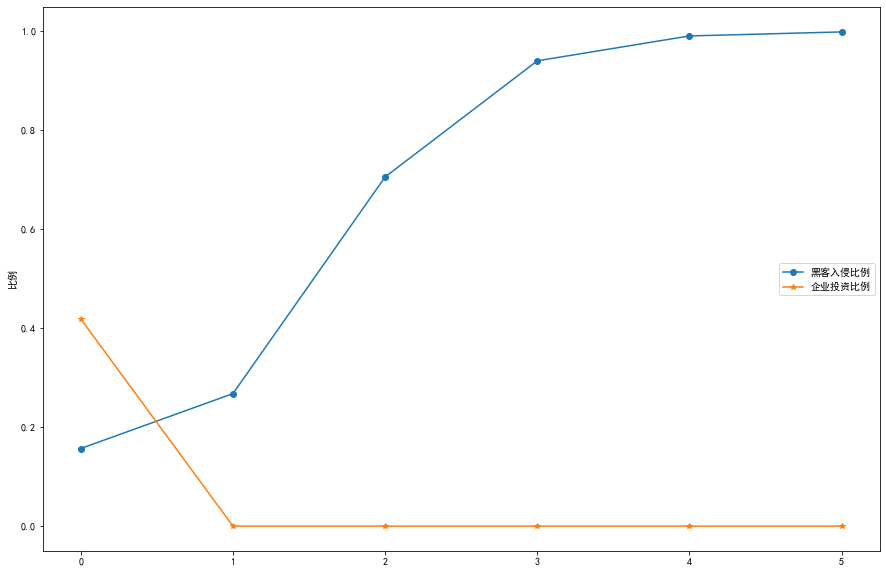

In [14]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,1)                                    # 黑客入侵的初始比例，保证满足x的取值范围，此处对x不要求，取0-1区间
init_y = random.uniform(0,(k*z+1)*(a*c*L-C)/(k*a*c*z*L))      # 企业投资的初始比例，保证满足y的取值范围
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

在这种情况下，企业投资比例y的演化稳定状态都为0，黑客入侵比例x的演化稳定状态为1。

## 第三种情形：动态复制方程x的临界点在0和1之间，但y的临界点小于等于0

In [15]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = (k*z+1)/(k*a*c)         # 企业损失的最小值，保证满足该情形的必要条件
high = C/(a*c)                # 企业损失的最大值，保证满足该情形的必要条件
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


### 第一种子情况：
x的初始比例小于动态复制方程x的临界点

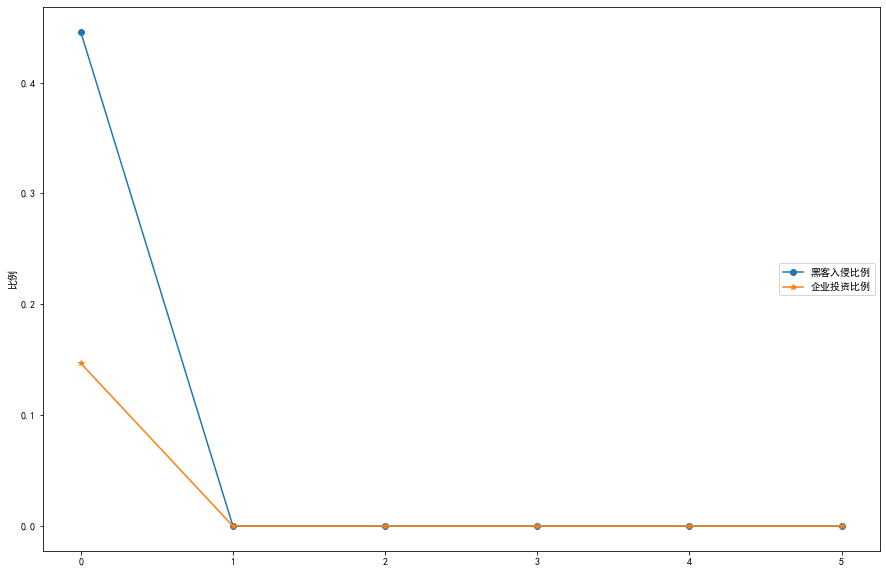

In [16]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,(k*z+1)/(k*a*c*L))                  # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform(0,1)                                   # 企业投资的初始比例，保证满足y的取值范围，此处对y不要求，取0-1区间
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

### 第二种子情况：
x的初始比例大于动态复制方程x的临界点

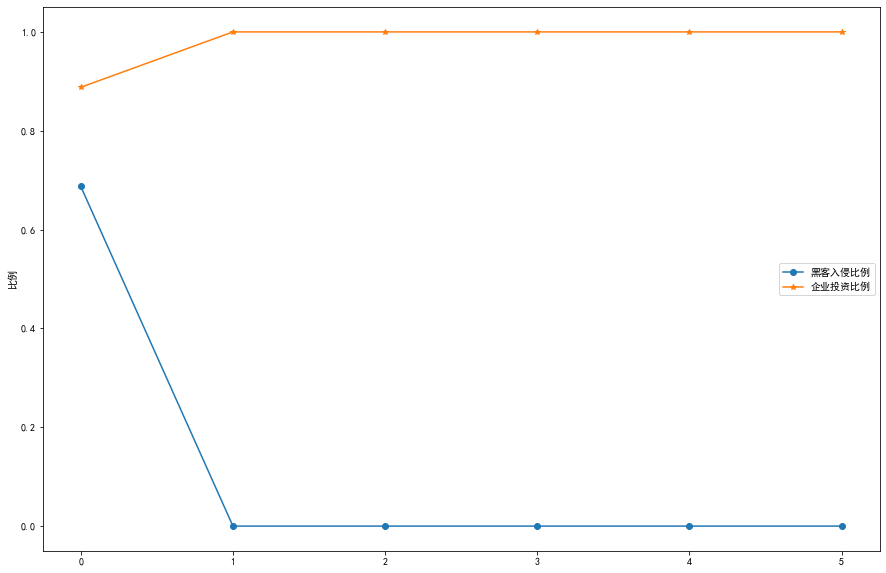

In [17]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform((k*z+1)/(k*a*c*L),1)                  # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform(0,1)                                   # 企业投资的初始比例，保证满足y的取值范围，此处对y不要求，取0-1区间
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

## 第四种情形：动态复制方程x的临界点在0和1之间，但y的临界点大于等于1

In [18]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = min((k*z+1)/(k*a*c),C*(1+k*z)/(a*c))         # 企业损失的最小值，保证满足该情形的必要条件
high = 10000000                                     # 企业损失的最大值，保证满足该情形的必要条件,此处无限制，则给一个足够大的数
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


### 第一种子情况：
x的初始比例小于动态复制方程x的临界点

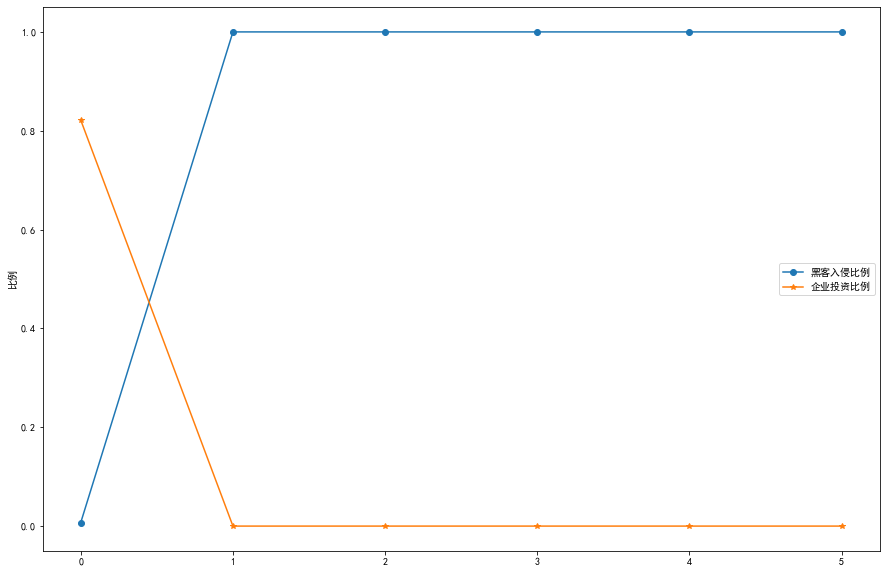

In [19]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,(k*z+1)/(k*a*c*L))                  # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform(0,1)                                   # 企业投资的初始比例，保证满足y的取值范围，此处对y不要求，取0-1区间
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

### 第二种子情况：
x的初始比例大于动态复制方程x的临界点

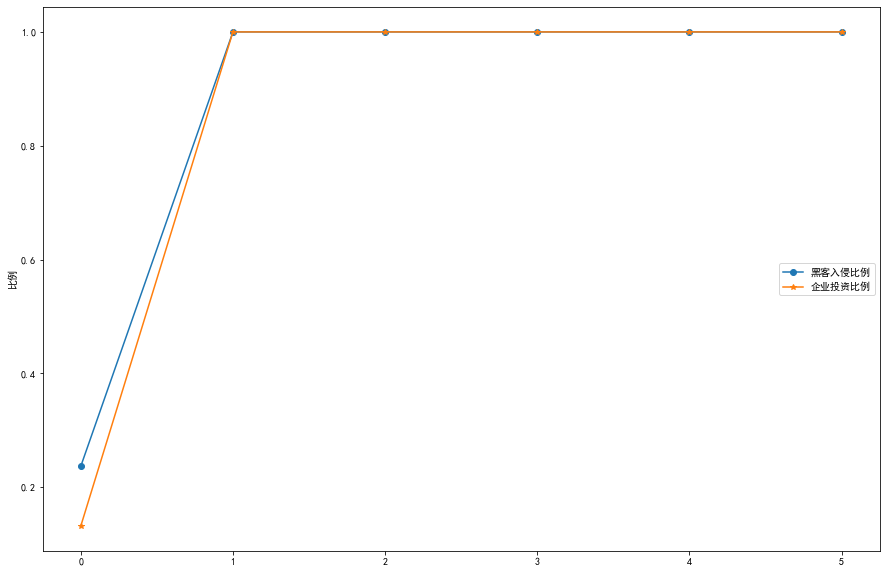

In [20]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform((k*z+1)/(k*a*c*L),1)                  # 黑客入侵的初始比例，保证满足x的取值范围
init_y = random.uniform(0,1)                                   # 企业投资的初始比例，保证满足y的取值范围，此处对y不要求，取0-1区间
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

## 第五种情形：动态复制方程x的临界点大于1，y的临界点大于等于1

In [21]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = C*(1+k*z)/(a*c)        # 企业损失的最小值，保证满足该情形的必要条件
high = (k*z+1)/(k*a*c)       # 企业损失的最大值，保证满足该情形的必要条件,此处无限制，则给一个足够大的数
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

此时企业损失最小值为： 50062499.99999999
此时企业损失最大值为： 12515.624999999996
参数假设不合理，请重新假设


上述可通过降低投资效率k参数或降低黑客入侵成本C使得满足该情形条件，说明现实条件中可以通过提高投资效率提高黑客入侵成本从而避免该情况的发生

In [22]:
# 初始化
z = 1000         # 企业投资水平
k = 0.00001          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = C*(1+k*z)/(a*c)        # 企业损失的最小值，保证满足该情形的必要条件
high = (k*z+1)/(k*a*c)       # 企业损失的最大值，保证满足该情形的必要条件,此处无限制，则给一个足够大的数
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


### 子情况（只有一种可能）

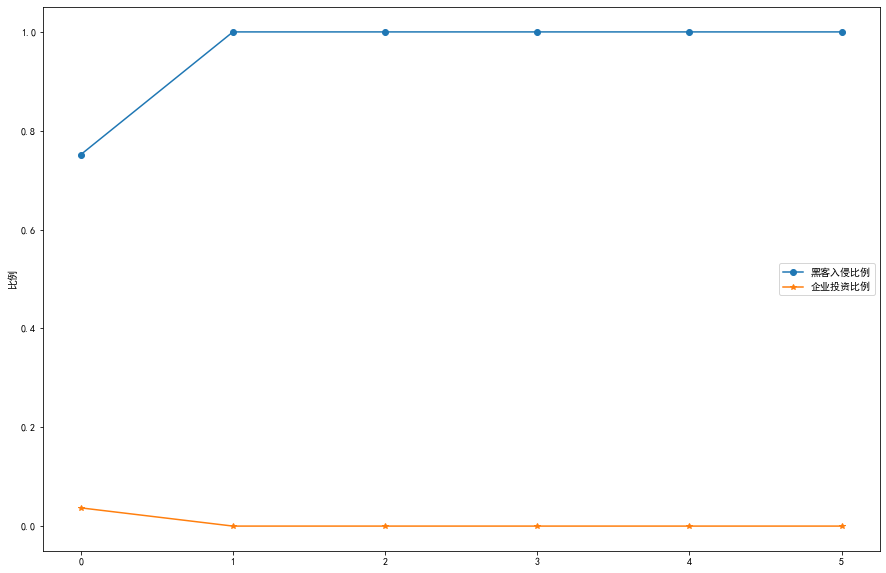

In [23]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,1)                                    # 黑客入侵的初始比例，保证满足x的取值范围，此处对x不要求，取0-1区间
init_y = random.uniform(0,1)                                   # 企业投资的初始比例，保证满足y的取值范围，此处对y不要求，取0-1区间
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()

## 第六种情形：动态复制方程x的临界点大于1，y的临界点小于等于0

In [24]:
# 初始化
z = 1000         # 企业投资水平
k = 0.8          # 企业安全投资效率
c = 0.2          # 企业对外连接度
C = 5000         # 黑客入侵成本
a = 0.4          # 黑客攻击概率
low = 0                                # 企业损失的最小值，保证满足该情形的必要条件,此处无限制，则给0
high = min((k*z+1)/(k*a*c),C/(a*c))   # 企业损失的最大值，保证满足该情形的必要条件
# 判断上述参数假设是否合理，需保证企业损失的最小值小于最大值
if low<high:
    print('假设合理')
else:
    print('此时企业损失最小值为：',low)
    print('此时企业损失最大值为：',high)
    print('参数假设不合理，请重新假设')

假设合理


### 子情况（只有一种可能）

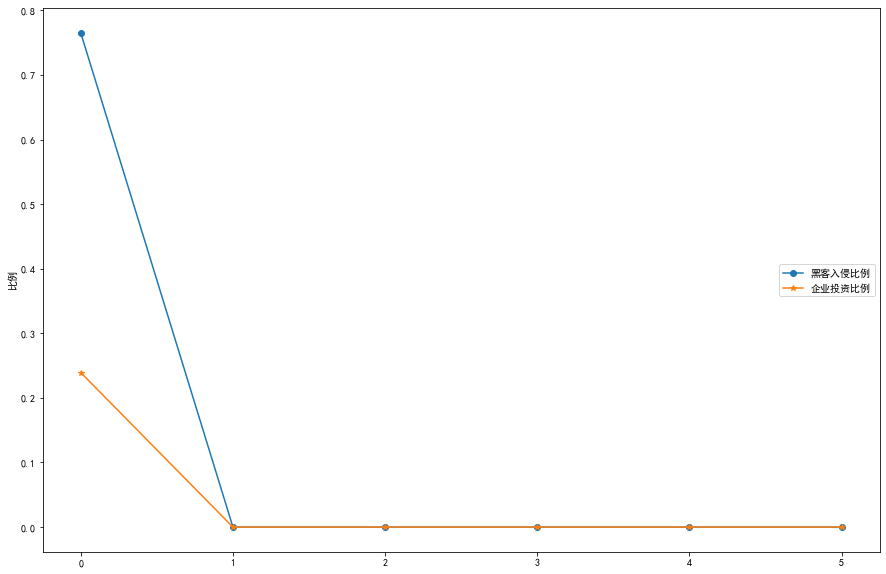

In [25]:
L = random.randint(low+1,high-1)                                # 企业损失,1是为了消除计算机浮点数运算的影响
init_x = random.uniform(0,1)                                    # 黑客入侵的初始比例，保证满足x的取值范围，此处对x不要求，取0-1区间
init_y = random.uniform(0,1)                                   # 企业投资的初始比例，保证满足y的取值范围，此处对y不要求，取0-1区间
list_x = [init_x]                                              # 记录黑客入侵的比例
list_y = [init_y]                                              # 记录企业进行投资的比例


# 迭代
for i in range(5):
    t = np.arange(0, 5, 1)           
    result_y = odeint(func_y, y0=list_y[-1], t=t)   #第一个参数为调用函数名，第二个参数为微分方程初始值，第三个参数为变量序列 
    list_y.append(transform(result_y[:,0][1]))      # 记录下一个时刻的企业投资比例
    result_x = odeint(func_x, y0=list_x[-1], t=t)   # 这里的y0实则为x0，但odeint函数的参数命名为y0
    list_x.append(transform(result_x[:,0][1]))      # 记录下一个时刻的黑客入侵比例

# 可视化啊
plt.figure(figsize=(15,10))
plt.plot(list_x, label='黑客入侵比例', marker='o')
plt.plot(list_y, label='企业投资比例', marker='*')
plt.ylabel('比例')
plt.legend(loc=7)
plt.show()